# Empalme con la clase anterior.

## Clasificacion.
Existen "infinidad" de problemas practicos que requieren soluciones discretas. La regresion como la estudiamos en esta clase es **continua**.
Por ejemplo

* Un paciente se diagnostica "si" o "no" para diabetes.
* Un servidor de e-mail quiere detectar si un email es "spam" o "no spam".
* Los bancos tratan de predecir si un producto puede ser "si" o "no" fraudulento.

En la clasificacion usamos **prediccion**.

En esta clase (curso) veremos los siguientes metodos predictivos (de clasificacion)

* Regresion logistica (hoy comenzamos con esto)
* SVM: Support Vector Machines
* ANN: Artificial Neural Networks.

Otros metodos no estudiados en esta clase por falta de tiempo son:
* Arboles de decision (decision tres)
* Bosques aleatorios (Random Forests. RD).

### Regresion Logistica:
Si pensamos en la regresion como la hemos venido estudiando, tendriamos

$$h(\Theta) = X \Theta = Y $$
Note primero que los simbolos son mayusculas. Aca $X, \Theta, Y$ pueden ser matrices.

Esta hipotesis tiene problemas en el disceto. Por que $Y$ puede tomar solo dos valores (si es binario)
Ya esto es un problema.

La funcion objetivo:
$$\min_{\Theta} J(\Theta) = \min_{\text{sobre} \Theta} \frac12 \| X \Theta - Y \|^2 $$

Esta seria la funcion de costo en regresion lineal. Vamos a ver que esta funcion de costo no es **apropiada** para clasficacion.

Para classificacion debemos "cambiar el chip". Debemos pensar diferente. Y si queremos determinar si una imagen es de un gato o un perro debemos usar probabilidades. El lenguaje es el de la probabilidad condicional.
Digamos, por ejemplo que un paciente $q_i$ puede o no tener cancer.

$$p(q_i  \text{tiene cancer} | x_i, \Theta) \ge \text{umbral} $$

Tarea para hoy:
Tenemos que pensar en varios elementos

* La hipotesis $h(\Theta)$. Definirla claramente.  
* Con esta hipotesis debemos definir una funcion de costo $J(\Theta)$.
Ojala convexa.
* Con la funcion de costo hallar el gradiente $\nabla_{\Theta} J(\Theta)$

Una forma ingenua de definir una probabilidad como hipotesis en un caso
binario donde $y$ puede tomar solo los valores $0,1$.

$$p_{ingenua} = p_{ingenua}( y=1 | x, \theta_0, \theta_1) = \theta_0 + \theta_1 x $$
Que probelmas tiene esto?

* La probabilidad esta en $[0,1]$. Pero esta funcion tiene rango en $(-\infty, \infty)$.

Vamos a buscar como resolver este problema. Una idea para esto es usar el concepto de "odds"  (chance). El chance se define como la fraccion entre ganar y perder. Matematicamente

$$\text{odds} = \frac{p}{1-p} $$
Una propiedad importante del chance es

odds $\ge 0$, odds $\in [0, \infty)$

Vamos a modificar el odds para que ajuste a nuestro problema.
Dos cosas queremos
* nuevo odds $\in (-\infty, \infty)$
* nuevo odds$(1/2)=0$. Que si $x<1/2$, odds$(x) < 0$, y si $x>1/2$ odds$(x)>0$.
* Simetrica nuevo odds$(x) = - $nuevo odds$(-x)$.
Esto se logra con el logaritmo.

$$ q = \log \frac{p}{1-p} $$
Observe que

* $q(1/2) = 0$
* $q(x) <0 $ si $x < 1/2$.
* $q(x) > 0 $ si $x > 1/2$.

Veamos la simetria

$$\log \frac{p}{1 - p} = \log p - \log (1-p) =-[ \log(1-p) - \log p]= -\log \frac{1-p}{p} $$

El hecho de que el rango de la nueva funcion $q$ es $(-\infty, \infty)$ me permite formular el modelo

$$\log \frac{p}{1-p} = \theta_0 + \theta_1 x \tag{1} $$
A la ecuacion (1) se le llama **regresion logistica**.

sea $y= \theta_0 + \theta_1 x = (\theta_0 \quad  \theta_1) \binom{1}{x} = (1  \quad x) \binom{\theta_0}{\theta_1} $

De la ecuacion (1)
$$\log \frac{p}{1-p} = y$$
Vamos a despejar la probabilidad $p$.

\begin{eqnarray}
\log \frac{p}{1-p} &=& y \\
\frac{p}{1-p} &=& \mathrm{e}^y \\
p &=& (1 - p) \mathrm{e}^y \\
p + p \mathrm{e}^y &=& \mathrm{e}^y \\
 p(1 + \mathrm{e}^y) &=& \mathrm{e}^y \\
 p &=& \frac{\mathrm{e}^y}{1 + \mathrm{e}^y} \\
 p &=& \frac{1}{1 + \mathrm{e}^{-y}}
 p &=& \frac{1}{1 + \mathrm{e}^{-X^T \theta}}
\end{eqnarray}
donde $X=(1,x)$.

La funcion que obtuvimos es muy importante y se llama la **logistic sigmoid** (por que es como una $S$, es decir

$$S(t) =  \frac{1}{1 + \mathrm{e}^{-t}} $$


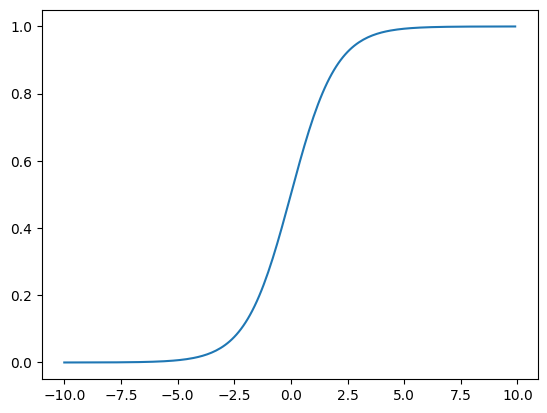

In [ ]:
# graficar la funcion sigmoid
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    return 1/(1 + np.exp(-t))

# grafiquemos sigmoid
dominio = np.arange(-10, 10, 0.1)
plt.plot(dominio, sigmoid(dominio))
plt.show()

Algunas propiedades de la derivada funcion sigmoid logistics

* La derivada

$$S'(t) = \mathrm{e}^{-t} S^2 (t) \tag{2} $$
* La derivada
$$S'(t) =  S(t) (1 - S(t)) \tag{3} $$
Probemos la (2)

$$S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \mathrm{e}^{-t} S^2(t) $$

Veamos la (3)

$$S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} =
\frac{1}{1 + \mathrm{e}^{-t} } \frac{\mathrm{e}^{-t}}{1 + \mathrm{e}^{-t}}=
S(t) \left ( 1 - \frac{1}{1 + \mathrm{e}^{-t} } \right ) = S(t) (1 - S(t)). $$

Estamos listos para definir la hipotesis

$$h(\Theta, x^{(i)}) = S( x^{(i)} \Theta) = \frac{1}{1  + \mathrm{e}^{-{x^{(i)}}^T \Theta}} $$

Podemos pensar en probabilidades. Por ejemplo si la variable $Y$ tiene dos opciones 0,1. Y, por ejemplo $Y^{(i)} = 1$ para un $x^{(i)}$ escribimos

$$h(\Theta, x^{(i)}) = S(\Theta^T x^{(i)}) = p( Y^{(i)}=1 | x^{(i)}, \Theta)  $$
$$p( Y^{(i)}=0 | x^{(i)}, \Theta) = 1 - p( Y^{(i)}=1 | x^{(i)}, \Theta)= 1 - h(\Theta, x^{(i)})  =1 - S(\Theta^T x^{(i)}) $$

En el sentido estricto, si tenemos solo dos clases (binarias) podemos definir una hipotesis binaria dado un umbral $\gamma$. Por ejemplo $\gamma=1/2$.

$$h_{binaria}(\Theta, x^{(i)}) =
\begin{cases}
1 \quad , \quad \text{si  } S((x^{(i)})^T \Theta)  > \gamma \\
0 \quad , \quad \text{si  } S((x^{(i)})^T \Theta)  \le \gamma \\
\end{cases}
$$

## Funcion de costo para la regresion logistica.
### Introduccion
Recuerde la funcion de costo para la regresion lineal

$$J(\theta) = \frac12 \| h(\theta, X) - Y \|^2 = \frac12 \sum_{i=1}^m [ h_i(\theta , X) - Y_i)^2 $$

Podriamos pensar que esta es una buena funcion de costo para la regresion lineal, teniendo en cuenta que la hipotesis $h$ es una probabilidad.
Desafortunadamente esta funcion de costo **no es simpre convexa**. Veamos un ejemplo que prueba esto. Asumamos

* Una sola muestra (la suma es un termino)
* $Y^{(i)}=1$. El argumento de la hipotesis $X^T \theta = \theta_0 + \theta_1 x$
con $x_i=1$
* La hipotesis es  $h(\theta, X) = S(1 + \theta)$

La funcion de costo es

 $$J(\theta ) = \frac12 ( S(1 + \theta) - 1)^2. $$
 Una forma de mostrar que una funcion no es convexa es mediante la segunda derivada.

 Recuerde las Ecuaciones (2) y (3)

 $$ \frac{d J(\theta)}{d \theta} = (S(1 + \theta) - 1) \mathrm{e}^{-1 -\theta} S^2(1 + \theta) = -\mathrm{e}^{-1 - \theta} S^2(1 + \theta) + S^3(1 + \theta) \mathrm{e}^{-1 - \theta} $$

Para la segunda derivdada

$$\frac{d^2 J(\theta)}{d \theta^2} = \mathrm{e}^{-1 - \theta} S^2(1 + \theta) +  2 S^3(1 + \theta) \mathrm{e}^{-2 -2 \theta} + 3 S^4(1 + \theta) \mathrm{e}^{-2 - 2 \theta} - S^3(1 + \theta) \mathrm{e}^{-1 - \theta}$$

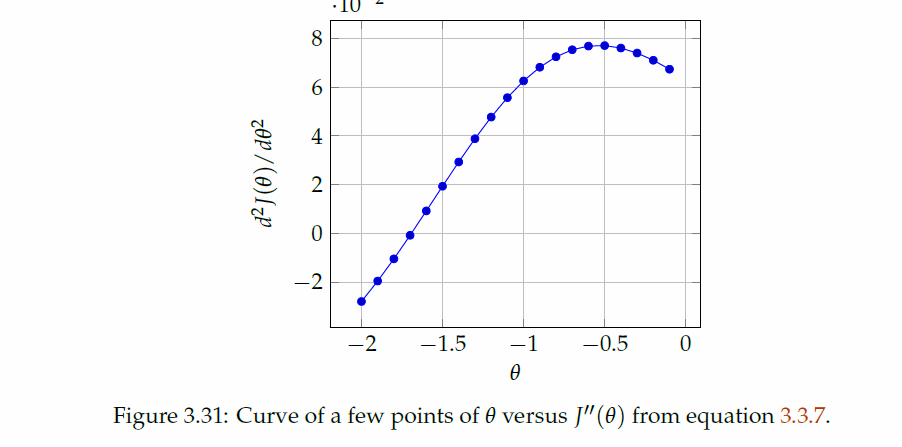

La Figura 3.31. muesrtra la segunda derivada de la funcion de costo con respecto a $\theta$. Es $<0$ en $\theta=02$ y $>0$ en $\theta = -1$. O sea que la funcion de costo no es ni concava ni convexa.  Desistimos de este metodo de hallar una funcion de costo.

Vamos a usar estadistica.
El argumento es el siguiente. Asuma que tenemos una poblacion de perros y gatos. Que la probabilidad de que un objeto $y_i=1$ sea un gato es

$$h(\theta, x^{(i)}) =p( y_i = \text{gato} | x^{(i)} | \theta) = S(x^{(i)} \theta) =  \frac{1}{1 + \mathrm{e}^{- x^{(i)} \theta}} $$

La probabilidad de un "perro" $y_i=0$ es

$$p(y_i= \text{perro} | x^{(i)}; \theta) = 1 - p( y_i= \text{gato} | x^{(i)}, \theta) = 1 - h(\theta, x^{(i)})  $$

Estas dos ecuaciones se pueden juntar en una sola (truco)

$$ p(y_i | x^{(i)}, \theta) = h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i}  $$

En la practica tenemos una **poblacion** de gatos y perros. Entonces debemos evaluar la probabilidad para la poblacion completa. Asumimos independencia estadistica de los miembros de la poblacion. Un objeto es gato o es perro pero no tiene tonos de gris. Independencia estadistica dice que la probabilidad de varios eventos simultaneos es el producto de las probabilidades de los eventos.
A esta probabilidad simultanea la llamamos **likelihood** (verosimilitud)

$$\mathcal{L}(\theta) = p(Y | X; \theta) = \prod_{i=1}^m h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i} $$

Podriamos pensar en esta funcion como funcion de costo a **maximizar**, sin embargo hallar el gradiente de una productoria no es nada facil. Entonces tomamos el logaritmo. (problema: probar que el maximo/minimo de una funcion no cambia cuando se le saca el logaritmo). Sin emabargo el logitmo es concavo, y queremos hallar el minimo. Entonces tomamos el logaritmo y cambios el signo.


$$\log \mathcal{L}(\theta) = \log p(Y | X; \theta) = \sum_{i=1}^m y_i \log h(\theta, x^{(i)}) +  (1 - y_i) \log (1 - h(\theta, x^{(i)}) $$

Cambiamos el signo y multiplicamos por $1/m$ por conveniencia.

$$J(\theta) = -\frac1m   \sum_{i=1}^m y_i \log h(\theta, x^{(i)}) +  (1 - y_i) \log (1 - h(\theta, x^{(i)})) $$

Esta es la funcion de costo de la regresion logistica.

Vamos partes:
* Sacamos el gradiente del primer termino.
* Sacamos el gradiente del segundo termino.
* sumamos esos gradientes (primero + segundo)
* hacemos la sumatoria $\sum_{i=1}^m$ de todos los terminos.

Veamos:

\require{cancel}
* Gradiente del primer termino
$$\frac{\partial y_i \log [ h(\theta, x^{(i)})]}{\partial \theta_k} = y_i \frac{1}{S} S(1-S) x_{ik}
= y_i (1 - S) x_{ik} $$

* Gradiente del segundo  termino
$$\frac{\partial (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]}{\partial \theta_k}
=-(1 - y_i) \frac{1}{1 -S} S ( 1  - S) x_{ik} = (y_i -1) S x_{ik} $$

* Suma de los dos Gradientes
\begin{eqnarray}
\frac{\partial y_i \log [ h(\theta, x^{(i)})]}{\partial \theta_k}
+  \frac{\partial (1 - y_i) \log [ 1 - h(\theta, x^{(i)})]}{\partial \theta_k}
&=& y_i (1 - S) x_{ik} + (y_i -1) S x_{ik} \\
y_i x_{ik} - \cancel{y_i S x_{ik}}  + \cancel{y_i S x_{ik}}  - S x_{ik} \\
&=& (y_i - S) x_{ik} \\
&=& -(h(\theta, x^{(i)}) - y_i) x_{ik}
\end{eqnarray}

* Hacer la sumatoria

$$\frac{\partial J(\theta)}{\partial \theta_k} = \frac1m \sum_{i=1}^m  (h ( \theta, x^{(i)}) - y_i) x_{ik} $$

## Decision boundary (frontera de decision).
Recuerden la hipotesis

$$h(\theta, x^{(i)}) = S( x^{(i)} \theta)  = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta}} $$
Esta es una probabilidad en el intervalo $(0,1)$. Si queremos hacer una **prediccion binaria** podemos pensar en definir un umbral $\gamma$. Si por ejemplo $\gamma=0.5$

$$h_{binaria} =
\begin{cases}
1 \quad , \quad \text{si  } S(x^{(i)} \theta) > \gamma \\
0 \quad , \quad \text{si  } S(x^{(i)} \theta) < \gamma \\
\end{cases}$$
Que pasas si $S(x^{(i)} \theta) = \gamma$. Por ejemplo $\gamma=1/2$.
Estamos en el borde. La Figura 3.34 ilustra esto.



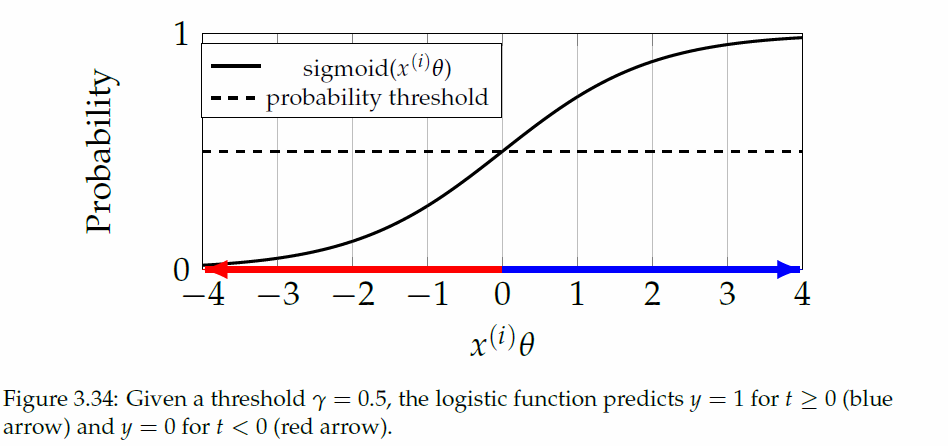

La **frontera de decision** esta dada por la superficie (curva)
$$x^{(i)} \theta = 0  $$
que es donde se produce el umbral $\gamma=1/2$.
Esto es una recta si estamos en $\mathbb{R}^2$. Seria
$\theta_0 + \theta_1 x + \theta_2 y=0$
En $\mathbb{R}^3$ seria un plano
$\theta_0 + \theta_1 x + \theta_2 y + \theta_3 z=0$
en $\mathbb{R}^n$ un hiperplano.

Como se encuentra este hiperplano?
* Use la hipotesis del problema (sigmoid logistic)
* Encuentre el gradiente y encuentre $\theta$
* Con el $\theta$ encontrado en el paso anterior, construya el
hiperplano $x^T \theta = 0$. Grafiquelo.

Ejemplo:

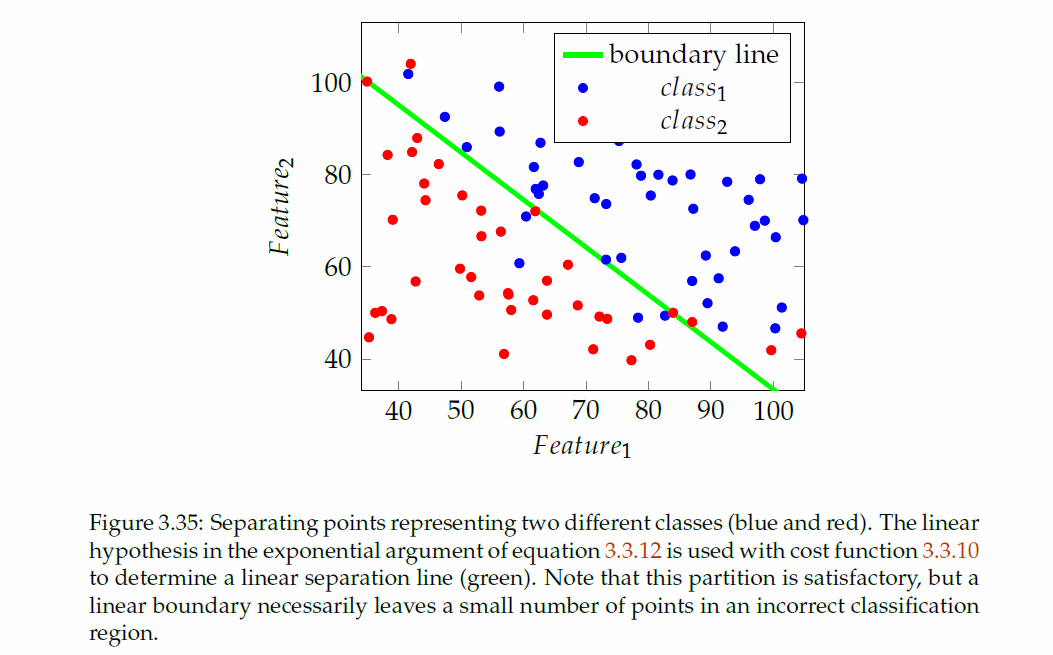

Si el conjunto no es **linealmente separable** (es decir no existe una linea, o plano, o hiperplano que separe "verdes" de los "azules" entonces podemos definir una funcion mas general que una funcion lineal. Por ejemplo

$$h(\theta, X) = S ( g(\theta, X)) $$
donde $G(\theta, X) \ne \theta^T X$
En vez piense que que $G$ es un polinomio de grado 8.

$$g(\theta, X) = \sum_{i=0}^8 \sum_{j=0}^i \theta_{[i(i+1)/2 + j} x_2^{j} x_1^{i-j}  $$
Esto es tarea para ustedes. Cuando se modela con este polinomio se crea una frontera de decision "cerrada" como la de la Figura 3.36.

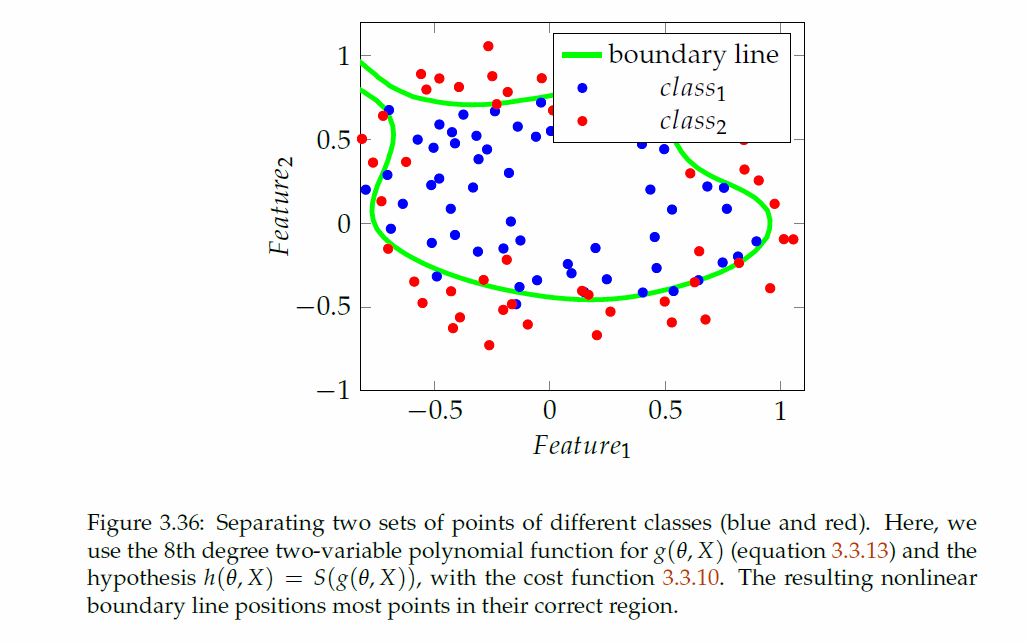

La curva no es complementamente cerrada. Podemos **regularizar**.

### Regularizacion:
Podemos pensar en la siguiente funcion de costo.
$$J(\theta) = -\frac1m   \sum_{i=1}^m y_i \log h(\theta, x^{(i)}) +  (1 - y_i) \log (1 - h(\theta, x^{(i)}))  + \frac{\lambda}{2 m} \| \theta \|^2$$

Con esta funcion de costo obtenemos el resultado en la Figura 3.37

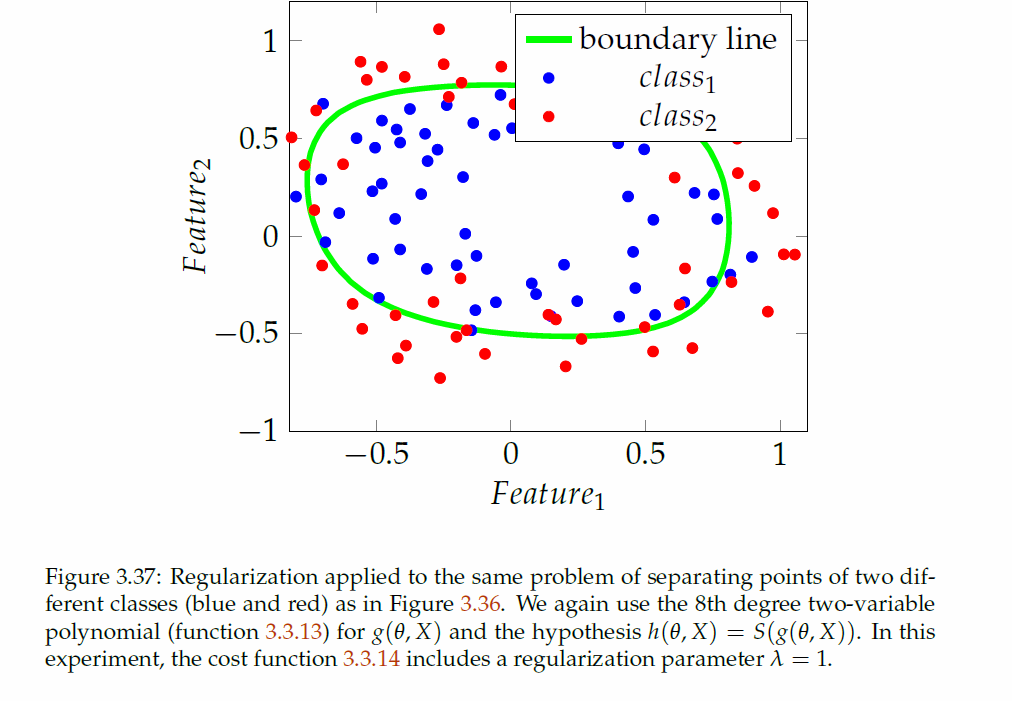

# Proxima clase:
## Clasificacion multiclase: $K>2$.

Metodos

* One-hot encoded
* Softmax function. La generalizacion de sigmoid logistic a 3 o mas clases.
* Uno contra todos (contra el resto).